In [5]:
#from __future__ import print_function
import sys
#sys.path.append('/Users/carlosbelardi/miniconda3/lib/python3.7/site-packages'),
import vamp
import librosa
from librosa import display
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from IPython.display import Audio
import csv
import pandas as pd
import pychorus
import numpy as np
import scipy as sp
from numpy import linalg as LA

In [6]:
pychorus.find_and_output_chorus('SweetCaroline.wav', 'SweetCarolineChorus.wav', 10)
pychorus.find_and_output_chorus('StacysMom.wav', 'StacysMomChorus.wav', 10)

audio_sc, sr = librosa.load('SweetCarolineChorus.wav', sr=44100, mono=True)
audio_sm, sr = librosa.load('StacysMomChorus.wav', sr=44100, mono=True)

hum, hsr = librosa.load('SweetCarolineHum.wav', sr=44100, mono=True)


print(audio_sm.shape)
print(hum.shape)
Audio(audio_sm, rate=sr)


Best chorus found at 2 min 52.23 sec
Best chorus found at 1 min 32.50 sec
(441000,)
(417784,)


In [7]:
chroma_sc, y_sc, sr_sc, song_length_sec_sc = pychorus.create_chroma('SweetCarolineChorus.wav')
chroma_sm, y_sm, sr_sm, song_length_sec_sm = pychorus.create_chroma('StacysMomChorus.wav')
chroma_hum, y_hum, sr_hum, song_length_sec_hum = pychorus.create_chroma('SweetCarolineHum.wav')


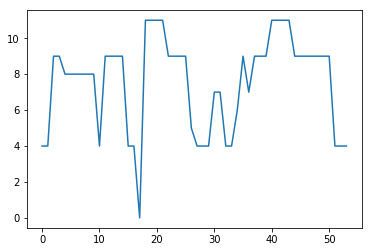

In [8]:
chorus_sm = []
for s in chroma_sm.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    chorus_sm.append(ind[0])

plt.figure()
plt.plot(chorus_sm)
plt.show()
  

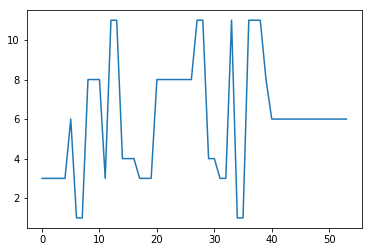

In [9]:
chorus_sc = []
for s in chroma_sc.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    chorus_sc.append(ind[0])

plt.figure()
plt.plot(chorus_sc)
plt.show()
  

0.19566777894669873


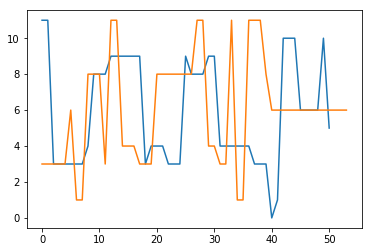

In [14]:
hum = []
for s in chroma_hum.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    hum.append(ind[0])
    

print(sp.spatial.distance.cosine(chorus_sc[0:51], hum))
# print(np.correlate())
plt.figure()
plt.plot(hum)
plt.plot(chorus_sc)
plt.show()

In [ ]:
librosa.display.specshow(chroma_hum, y_axis='chroma')

In [ ]:
librosa.display.specshow(chroma_sc, y_axis='chroma')

In [ ]:
def comparing_matrices(song_matrix, hum_matrix):
    sec_scores = []
    for i in range(len(song_matrix)-len(hum_matrix)):
        #curr_chunk = np.array(song_string[i:chunk_len+i])
        #curr_song_scores.append(len(np.where(curr_chunk==hum_string)[0]))
        #curr_song_scores.append(editdistance.eval(hum_string,curr_chunk))
        curr_song_matrix = song_matrix[i:len(hum_matrix)+i]
        matrix_diff = curr_song_matrix - hum_matrix
        sim_score = LA.norm(matrix_diff)
        sec_scores.append(sim_score)
    #print(sec_scores)
    return min(sec_scores)

In [ ]:
score_same = comparing_matrices(chroma_sc,chroma_hum)
print('Same: ',score_same)
score_diff1 = comparing_matrices(chroma_fgi,chroma_hum)
score_diff2 = comparing_matrices(chroma_cmm,chroma_hum)
score_diff3 = comparing_matrices(chroma_cali,chroma_hum)
score_diff4 = comparing_matrices(chroma_tub,chroma_hum)
print(score_diff1)
print(score_diff2)
print(score_diff3)
print(score_diff4)